In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Генеруємо двомірні данні (x,y), розподіл точок відбувається навколо прямоі y=kx+b

In [2]:
def generate_data(k_true, b_true, num_points, noise_std=2):
    x = np.linspace(0, 10, num_points)
    y_true = k_true * x + b_true
    noise = np.random.normal(0, noise_std, size=len(x))
    y = y_true + noise
    return x, y


2. Функція, яка реалізує метод найменших квадратів

In [3]:
def least_squares_method(x, y):
    k1 = k2 = 0

    for i in range(len(x)):
        k1 += (x[i] - np.mean(x)) * (y[i] - np.mean(y))
        k2 += (x[i] - np.mean(x)) ** 2

    k = k1 / k2
    b = np.mean(y) - k * np.mean(x)
    return k, b

In [4]:
# Визначаємо параметри для функціі
k_p = 2.5
b_p = 7.0
# Генеруємо данні
x, y = generate_data(k_p, b_p, num_points=200)
#Реалізуємо МНК
k_opt, b_opt = least_squares_method(x, y)

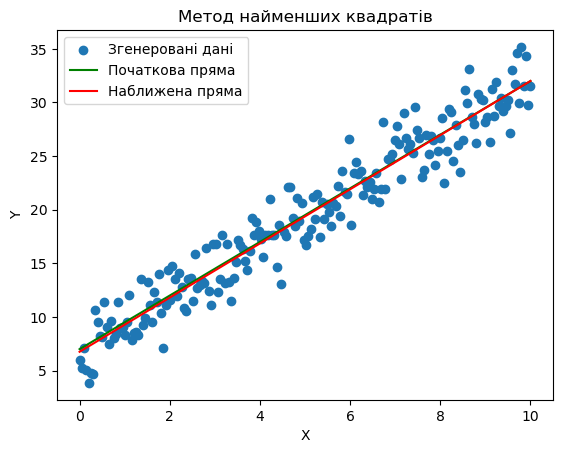

In [5]:
# Побудова графіку
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(x, k_p * x + b_p, label='Початкова пряма', color='green')
plt.plot(x, k_opt * x + b_opt, label='Наближена пряма', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Метод найменших квадратів')
plt.show()

3. Порівнюємо знайдені параметри з оцінкою np.polyfit(x,y,1)

In [6]:
np_params = np.polyfit(x, y, 1)
np_k, np_b = np_params[0], np_params[1]

my_params = least_squares_method(x, y)
my_k, my_b = my_params[0], my_params[1]
y_p = k_p * x + b_p

4. Відображаємо знайдені оцінки Numpy та Мнк

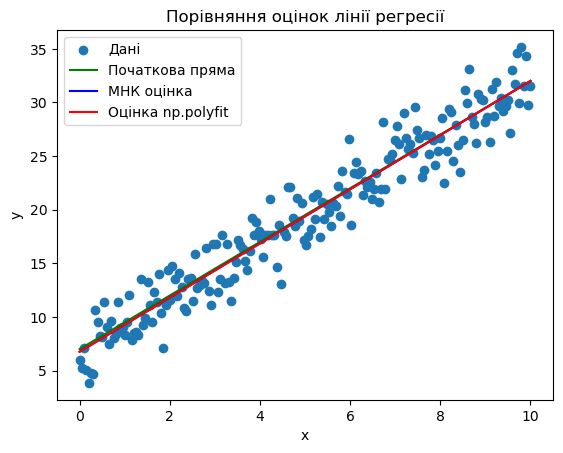

In [7]:
plt.scatter(x, y, label='Дані')
plt.plot(x, y_p, label='Початкова пряма', color='green')
plt.plot(x, my_k * x + my_b, label='МНК оцінка', color='blue')
plt.plot(x, np_k * x + np_b, label='Оцінка np.polyfit', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння оцінок лінії регресії')
plt.show()


5. Функція, що реалізує метод градієнтного спуску

In [8]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    # Ініціалізація параметрів
    k, b = 0, 0
    m = len(x)

    # Зберігаємо значення функції втрат на кожній ітерації
    errors = []

    for i in range(n_iter):
        # Обчислюємо градієнт для кожного параметра
        gradient_k = (-2/m) * np.sum(x * (y - (k*x + b)))
        gradient_b = (-2/m) * np.sum(y - (k*x + b))

        # Оновлюємо параметри за допомогою градієнтного спуску
        k = k - learning_rate * gradient_k
        b = b - learning_rate * gradient_b

        # Обчислюємо функцію втрат і додаємо її до списку
        error = np.sum((y - (k*x + b))**2) / m
        errors.append(error)

    return k, b, errors

6. Додаємо лінію регресіі на загальний графік, та будуємо графік похибки

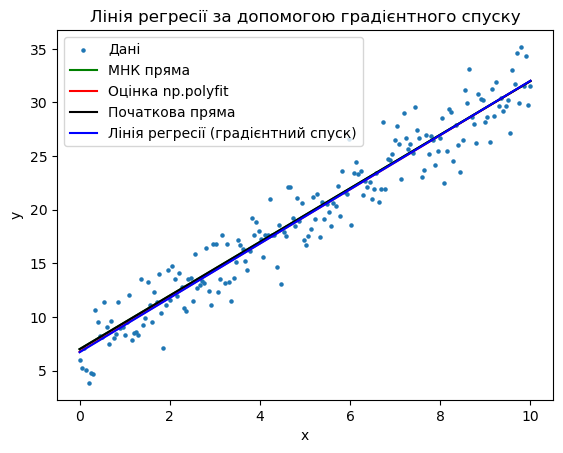

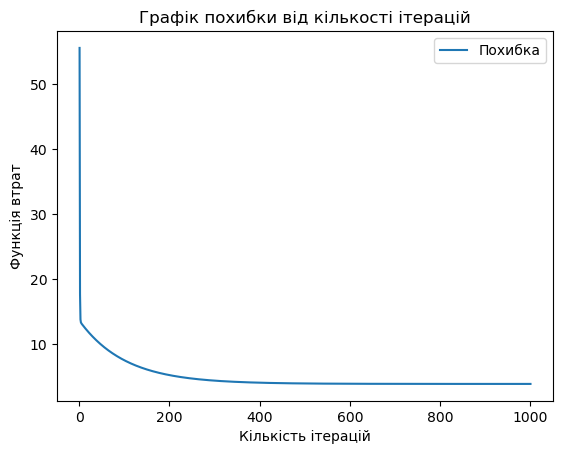

In [9]:
learning_rate = 0.01
n_iter = 1000
k_opt, b_opt, errors = gradient_descent(x, y, learning_rate, n_iter)

# Графік лінії регресії
plt.scatter(x, y, label='Дані', s=5)
plt.plot(x, y_p, label='МНК пряма', color='green')
plt.plot(x, np_k * x + np_b, label='Оцінка np.polyfit', color='red')
plt.plot(x, k_p * x + b_p, label='Початкова пряма', color='black')
plt.plot(x, k_opt * x + b_opt, label='Лінія регресії (градієнтний спуск)', color='blue')

# Додаткові параметри графіка
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінія регресії за допомогою градієнтного спуску')
plt.show()

# Графік похибки від кількості ітерацій
plt.plot(range(1, n_iter+1), errors, label='Похибка')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Функція втрат')
plt.title('Графік похибки від кількості ітерацій')
plt.legend()
plt.show()